1. What is the minimizer and minimum function value of f(x) ?, Is the minimizer unique ?, Is it local or global
minima ?, Are the functions f(x) and g(x) convex ?, explain each of them.

**Answer**

$f(x) = f(x_1,x_2) = x_1^2 + 4x_1x_2 + 4x_2^2$

It can also be written as

$f(x) = f(x_1,x_2) = (x_1+2x_2)^2$

since it is Quadratic polynomial so its minimum value is 0 but its minimizer is not unique because for line $x_1=-2x_2$ f(x) will become 0.

$\nabla^2{f(x)} = \begin{bmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy}\end{bmatrix}$

$\nabla^2{f(x)} = \begin{bmatrix} 2 & 4 \\ 4 & 8\end{bmatrix}$

the eigen value of hessian matrix are 0 and 10 i.e. both are greater than equal to 0 so it is positive semidefinite.So function is convex and there is global minima.

**g(x) is also convex function.**

2. Can you implement Algorithm 1 of this lab using Algorithm 1 of Lab 03 ?, Can you come up with a
useful choice for Dk ?, Does Dk satisfies the condition of being PSD or PD ?, Implement all this for function
f(x), With starting point x0 = (1, 40) and τ = 10−12, we will now study the behavior of coordinate
descent algorithm with backtracking line search, for different choices of ρ. Take α = 1, γ = 0.5. Try
ρ ∈ {0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each ρ, record the final minimizer, final objective function
value and number of iterations to terminate, for the coordinate descent algorithm with backtracking line search.
Prepare a plot where the number of iterations for the algorithm are plotted against ρ values. Use different
colors and a legend to distinguish the plots. Comment on the observations. Comment about the minimizers and objective function values obtained for different choices of the ρ values. Plot the level sets of the function
f(x) and also plot the trajectory of the optimization on the same plot and report your observations. Explain
the differences (you may try to implement Algorithm 1 of this lab as well !!) between Algorithm 1 of this
lab and Algorithm 1 of Lab 03 and explain which is superior over other and when ?

In [ ]:
import numpy as np
from numpy.linalg import norm
from numpy import exp, cos, sin
from math import sqrt, pi
from numpy import ma
def fx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return x1**2 + 4*x1*x2 + 4*x2**2

def gradient_fx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([2*x1+4*x2, 4*x1+8*x2])

def hessian_fx1(xk):
  return np.array([[2,4],[4,8]])


def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_fx1(xk)
  while fx1(xk + alpha*Dk@pk) > (fx1(xk) + gamma*alpha*gradient_fx1(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  rho=rho
  pk = -1*gradient_fx1(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    i = np.random.choice(range(len(xk)))
    Dk=np.array([[1-i, 0],[0, i]])
    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)

    xk = xk + alpha*(Dk@pk)
    pk = -1*gradient_fx1(xk)
    xks.append(xk)
    count += 1
  return count, xk, fx1(xk), xks

for rho 0.9 ,for iteration 6 minimizer is [ 0.93935865 -0.46967926] and Minimum value is 1.8540724511240114e-14  with scaling


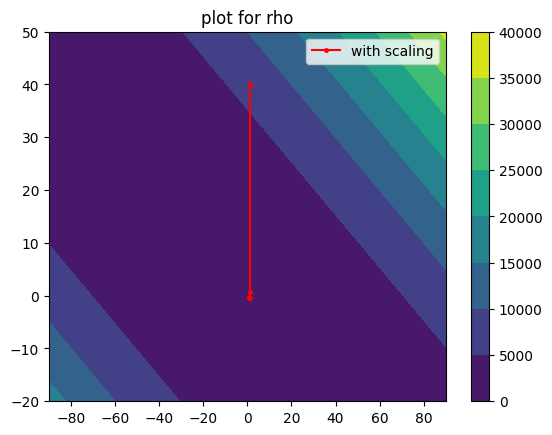

for rho 0.8 ,for iteration 10 minimizer is [-10.41077757   5.2053895 ] and Minimum value is 2.0605739337042905e-12  with scaling


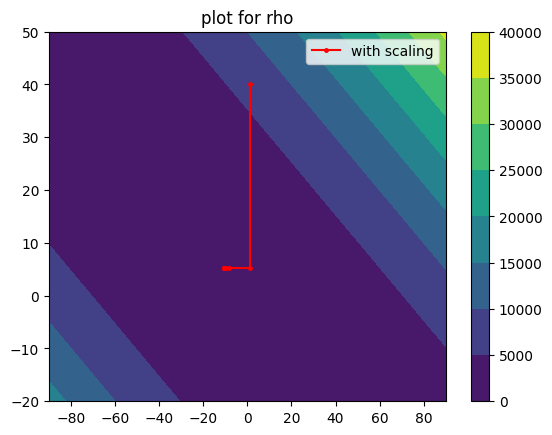

for rho 0.75 ,for iteration 10 minimizer is [-14.81149709   7.40574911] and Minimum value is 1.2789769243681803e-12  with scaling


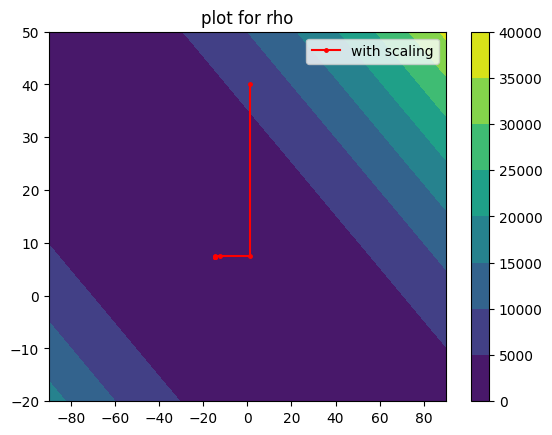

for rho 0.6 ,for iteration 16 minimizer is [-27.54697327  13.77348711] and Minimum value is 9.094947017729282e-13  with scaling


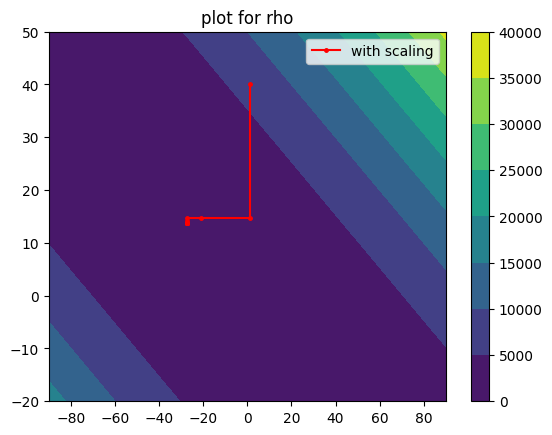

for rho 0.5 ,for iteration 1 minimizer is [ 1.  -0.5] and Minimum value is 0.0  with scaling


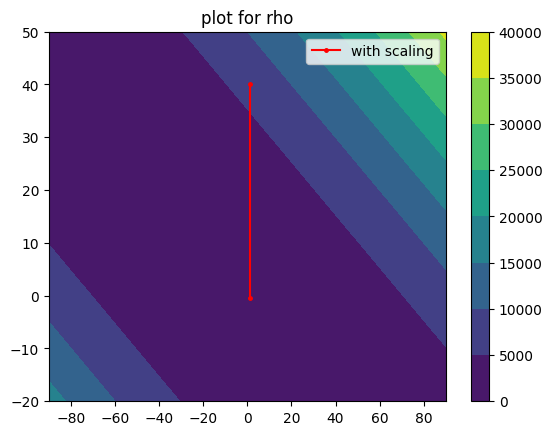

for rho 0.4 ,for iteration 16 minimizer is [-32.4335972   16.21679893] and Minimum value is 4.547473508864641e-13  with scaling


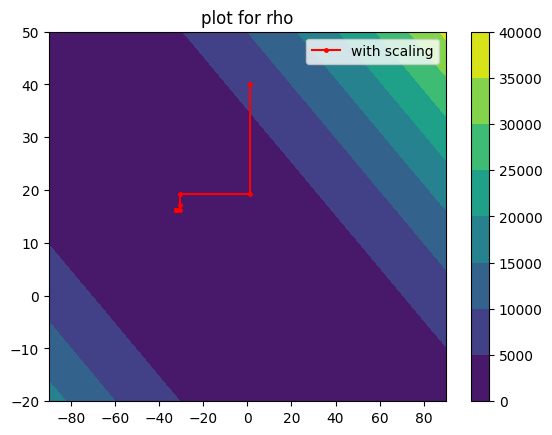

for rho 0.25 ,for iteration 26 minimizer is [-14.34387574   7.17193847] and Minimum value is 1.4779288903810084e-12  with scaling


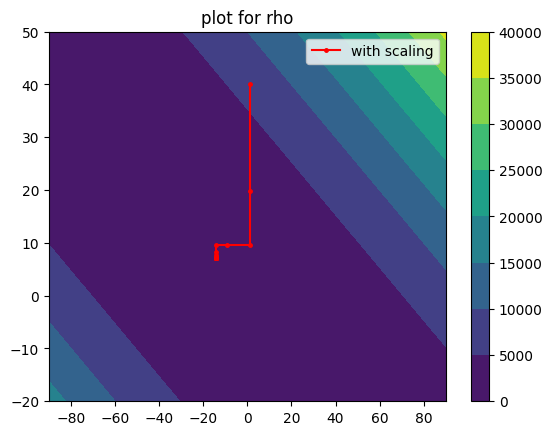

for rho 0.1 ,for iteration 25 minimizer is [-1.23914702  0.61957409] and Minimum value is 1.3626877404249171e-12  with scaling


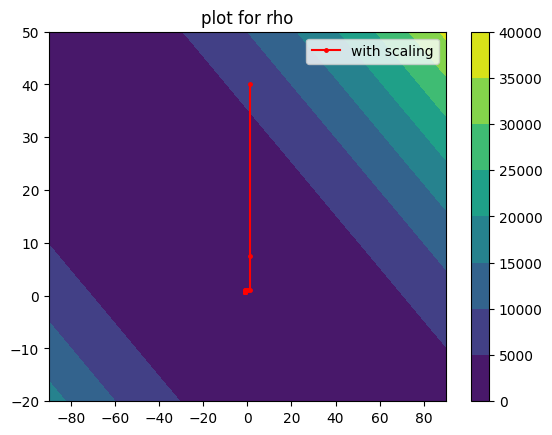

for rho 0.01 ,for iteration 324 minimizer is [-12.13153994   6.06577108] and Minimum value is 4.945377440890297e-12  with scaling


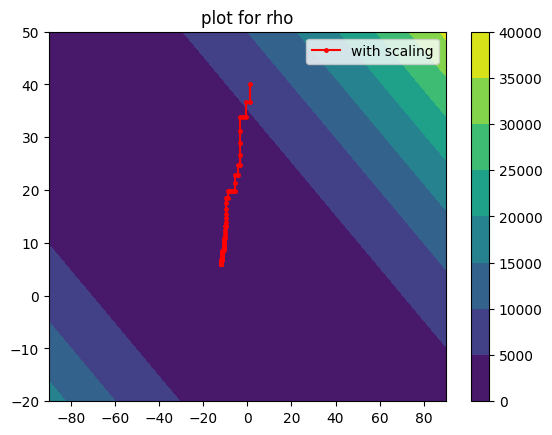

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
x0 = np.array([1,40])
tau = 1e-5
alpha0 = 1
gamma = 0.5
rhos = [0.9, 0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

from numpy.linalg import norm

iterations_backtracking_with_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []


for rho in rhos:
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0)

  print("for rho",rho,",for iteration",count2,"minimizer is",final_xk2,"and Minimum value is",final_val2," with scaling")


  x = np.linspace(-90, 90, 5000)
  y = np.linspace(-20, 50, 5000)
  X, Y = np.meshgrid(x, y)
  Z = fx1((X,Y))
  p = plt.contourf(X,Y,Z)
  plt.title("plot for rho")
  cbar = plt.colorbar(p)
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='red',  marker = '.', markersize = 5, label = 'with scaling')
  plt.legend()
  plt.show()
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_with_scaling.append(final_val2)

**For different value of rho we get minimum value of f(x) which is approximately zero for more details I have priitted for each value of rho what is the number of iteration and minimum value.**

Explain
the differences between Algorithm 1 of this
lab and Algorithm 1 of Lab 03 and explain which is superior over other and when ?

**Algorithm 1 of lab04 is faster as compare to algorithm of lab03 becuase in this algorithm is focusing on a particular value of $x_i$ so it will fisrt focus on that $X_i$ and decrease it after that it will focus other $x_i's$ .So in this way we get minimum of f(x) in less iteration and less time will be taken.So we can say that algorithm 1  of lab04 is superior over other for large value of rho**

3. Consider any general function h(y) (y ∈ Rd), denote its linearization around a fixed point x by t(y). Evaluate
proxλt(x). What is the result ?, Is the result that you got looks familiar to you ? Explain in detail.

Linearization around a fixed point x by t(y) is given as

g(y)=g(x) + $\nabla{g(x)}^T(y-x)$

h(x)= argmin(g(x) + $\nabla{g(x)}^T(y-x)$ + 1/2$\lambda\| y-x\|_2^2)$

$\nabla{h(x)}=$0+$\nabla{g(x)}$+ 1/$\lambda(\| y-x\|)(-1)=0$

On solving we get,the required result

x=y-$\lambda$$\nabla{g(y)}$

**the above equation is similar to gradient decent method,here y is old value of x and $\lambda$ is step size and $\nabla{g(y)}$ is gradient of g(x) are old point i.e. at y and on solving we get new point x**

4. Simplify proxλg(y) with g(x) as defined in equation (1) and use that in Algorithm 2. Take L = {x ∈ Rd; xi ≥
0∀i = 1, ..., d} and further simplify it. Now after all these simplifications implement Algorithm 2 to solve
minx∈L f(x) = minx∈L(x1 − 1)2 + x22
+ (x3 + 1)2, take x0 = (0, 0, 0), η = 0.3 and,
try T ∈ {102, 500, 103, 5000, 104, 50000, 105, 500000, 106, 5000000}. For each T, record the final minimizer, final
objective function value and percentage error between practical and theoretical optimal objective function value
at termination. Prepare a plot where the percentage error between practical and theoretical optimal objective
function value from the algorithm are plotted against T values. Use different colors and a legend to distinguish
the plots. Comment on the observations. Comment about the minimizers and objective function values obtained
for different choices of the T values. Plot the level sets of the function f(x) and also plot the trajectory of the
optimization on the same plot and report your observations

In [10]:
import numpy as np
from numpy.linalg import norm
from numpy import exp, cos, sin
from math import sqrt, pi
from numpy import ma
def fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  x3 = xk[2]
  return (x1-1)**2 + x2**2 + (x3+1)**2

def gradient_fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  x3 = xk[2]
  return np.array([2*(x1-1), 2*x2,2*(x3+1)])

def prox(xk):
  yts=[]
  for x in xk:
    if x<0:
      yt=0
    else:
      yt=x
    yts.append(yt)
  return yts

alpha=0.3

def gradient_descent_with_backtracking_with_scaling(x0, T):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_fx(xk)
  xks = []
  xks.append(xk)
  while count<rho:
    pk = -1*gradient_fx(xk)
    xk = xk + alpha*pk
    xk=prox(xk)

    xks.append(xk)
    count += 1
  return count, xk, fx(xk), xks



for rho 100 ,for iteration 100 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


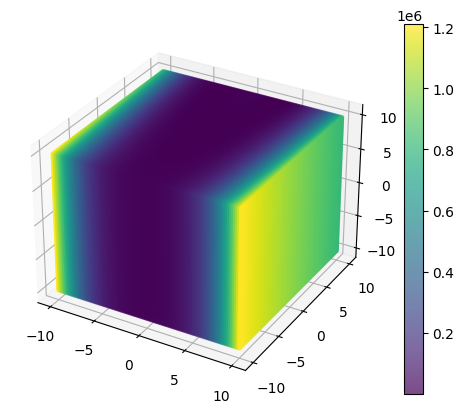

for rho 500 ,for iteration 500 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


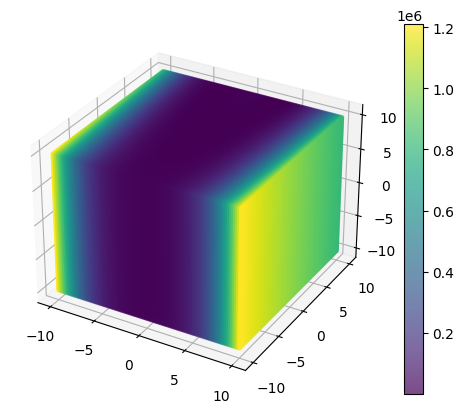

for rho 1000 ,for iteration 1000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


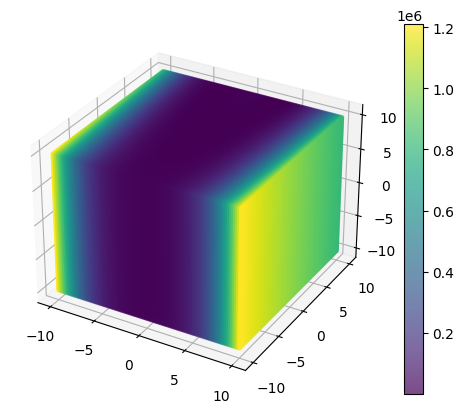

for rho 5000 ,for iteration 5000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


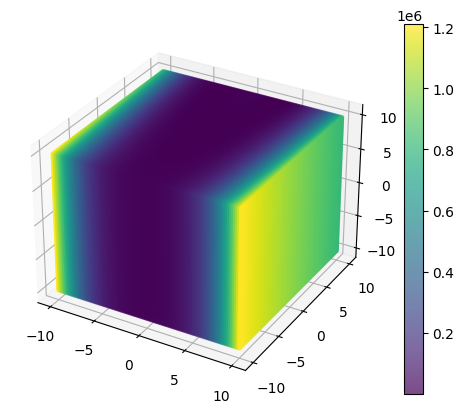

for rho 10000 ,for iteration 10000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


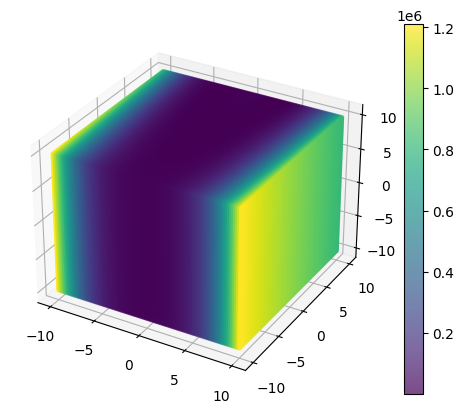

for rho 50000 ,for iteration 50000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


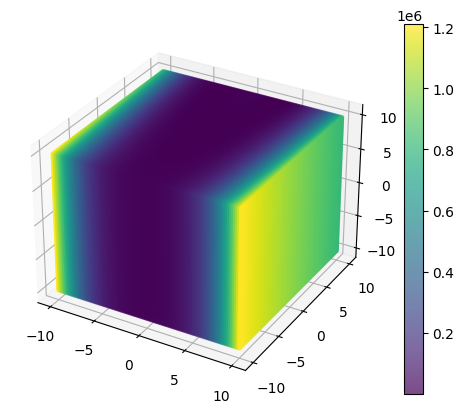

for rho 100000 ,for iteration 100000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


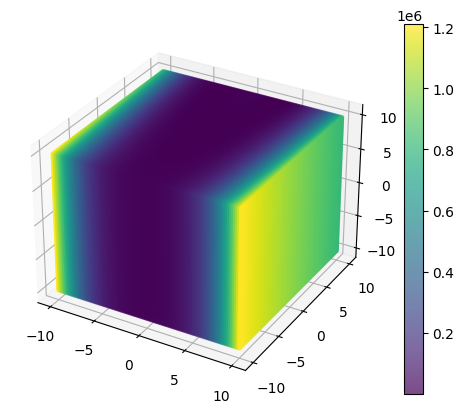

for rho 500000 ,for iteration 500000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


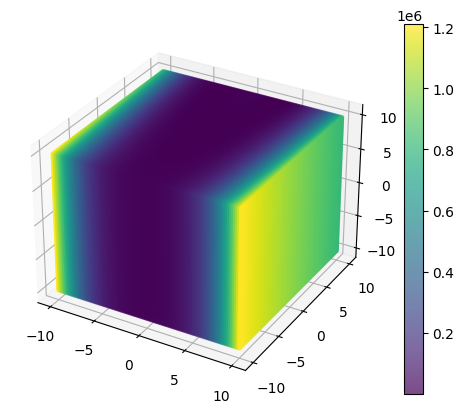

for rho 1000000 ,for iteration 1000000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


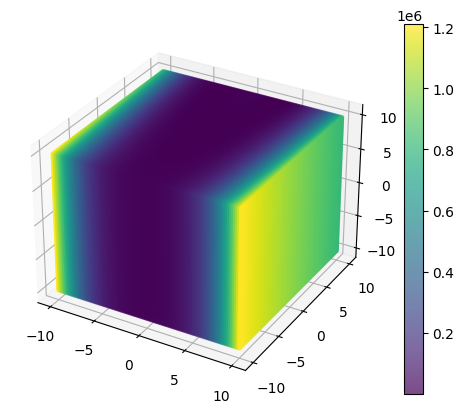

for rho 5000000 ,for iteration 5000000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0  with scaling


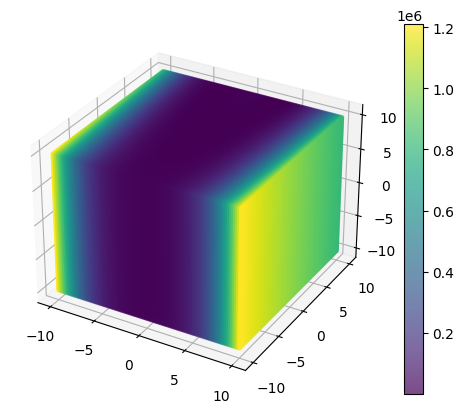

In [11]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
x0 = np.array([0,0,0])
alpha = 0.3
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

from numpy.linalg import norm

iterations_backtracking_with_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []


for rho in T:
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, T)

  print("for rho",rho,",for iteration",count2,"minimizer is",final_xk2,"and Minimum value is",final_val2," with scaling")


  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  z = np.linspace(-10, 10, 100)
  X, Y ,Z= np.meshgrid(x, y,z)
  U = fx1([X,Y,Z])
  fig = plt.figure()
  ax = plt.axes(projection="3d")

  # Creating plot
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  zcordinates2 = [xk1[2] for xk1 in xks2]
  ax.scatter(xcordinates2,ycordinates2 , zcordinates2,  color='red')
  img=ax.scatter3D(X, Y, Z, c=U, alpha=0.7, marker='.')
  fig.colorbar(img)
  coor1=[]
  coor2=[]
  coor3=[]
  for k in xks2:
    coor1.append(k[0])
    coor2.append(k[1])
    coor3.append(k[2])
  ax.scatter(coor1 ,coor2 , coor3,  color='red')

  plt.show()

**Observation**

Here from the given algorithm 2 minimum calculated value of function is approx 1 and we see that for each iteration may be we get minimum value before the maximum iteration use in algorithm in each case.Since in each case we see that value of rho and number of iteration taken to find minimum value of f(x) are same.

**This algorithm is not giving exact minimum value of f(x) but it very fast as compare to gradient decend algorithm of lab03**

In [8]:
import numpy as np
from numpy.linalg import norm
from numpy import exp, cos, sin
from math import sqrt, pi
from numpy import ma
def fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  x3 = xk[2]
  return (x1-1)**2 + x2**2 + (x3+1)**2

def gradient_fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  x3 = xk[2]
  return np.array([2*(x1-1), 2*x2,2*(x3+1)])

def prox(xk):
  yts=[]
  for x in xk:
    if x<0:
      yt=0
    else:
      yt=x
    yts.append(yt)
  return yts

alpha=0.7

def gradient_descent_with_backtracking_with_scaling(x0, T):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_fx(xk)
  xks = []
  xks.append(xk)
  while count<rho:
    pk = -1*gradient_fx(xk)
    xk = xk + alpha*pk
    xk=prox(xk)

    xks.append(xk)
    count += 1
  return count, xk, fx(xk), xks

In [9]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
x0 = np.array([0,0,0])
alpha = 0.7
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

from numpy.linalg import norm

iterations_backtracking_with_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []


for rho in T:
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, T)

  print("for rho",rho,",for iteration",count2,"minimizer is",final_xk2,"and Minimum value is",final_val2)

for rho 100 ,for iteration 100 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 500 ,for iteration 500 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 1000 ,for iteration 1000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 5000 ,for iteration 5000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 10000 ,for iteration 10000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 50000 ,for iteration 50000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 100000 ,for iteration 100000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 500000 ,for iteration 500000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 1000000 ,for iteration 1000000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0
for rho 5000000 ,for iteration 5000000 minimizer is [1.0, 0.0, 0] and Minimum value is 1.0


Will gradient descent with η = 0.7 gives the same
solution to the problem that we considered in this task ?

**Yes**


**When η = 0.7**

For both value of η = 0.7 and η = 0.3 minimum value from algprithm 2 is 1

5. Simplify proxλg(y) with g(x) as defined in equation (1) and use that in Algorithm 2. Take L = {x ∈
Rd; ∥x∥2 ≤ 1} and further simplify it. Now after all these simplifications implement Algorithm 2 to solve
minx∈L f(x) = minx∈L 100(x2 − x21
)2 + (0.5 − x1)2, take x0 = (0, 0), η = 0.3 and,
try T ∈ {102, 500, 103, 5000, 104, 50000, 105, 500000, 106, 5000000}. For each T, record the final minimizer, final
objective function value and percentage error between practical and theoretical optimal objective function value
at termination. Prepare a plot where the percentage error between practical and theoretical optimal objective
function value from the algorithm are plotted against T values. Use different colors and a legend to distinguish
the plots. Comment on the observations. Comment about the minimizers and objective function values obtained
for different choices of the T values. Plot the level sets of the function f(x) and also plot the trajectory of the
optimization on the same plot and report your observations. Will gradient descent with η = 0.7 gives the same
solution to the problem that we considered in this task ?

In [4]:
import numpy as np
from numpy.linalg import norm
from numpy import exp, cos, sin
from math import sqrt, pi
from numpy import ma
def fx1(xk1):
  x1 = xk1[0]
  x2 = xk1[1]
  return 100*(x2-x1**2)**2 + (0.5-x1)**2

def gradient_fx1(xk1):

  x1 = xk1[0]
  x2 = xk1[1]
  return np.array([-400*x1*(x2-x1**2)-2*(0.5-x1), 200*(x2-x1**2)])

def prox(xk1):

  if norm(xk1)<=1:
    yt=xk1
    return yt
  else:
    yt=xk1/norm(xk1)
    return  yt


alpha=0.3

def gradient_descent_with_backtracking(x0, T):
  xk1 = np.copy(x0)

  count = 0
  pk = -1*gradient_fx1(xk1)
  xk1s = []
  xk1s.append(xk1)
  while count<rho:
    pk = -1*gradient_fx1(xk1)
    xk1 = xk1 + alpha*pk
    xk1=prox(xk1)
    xk1s.append(xk1)
    count += 1
  return count, xk1, fx1(xk1), xk1s

for rho 100 ,for iteration 100 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


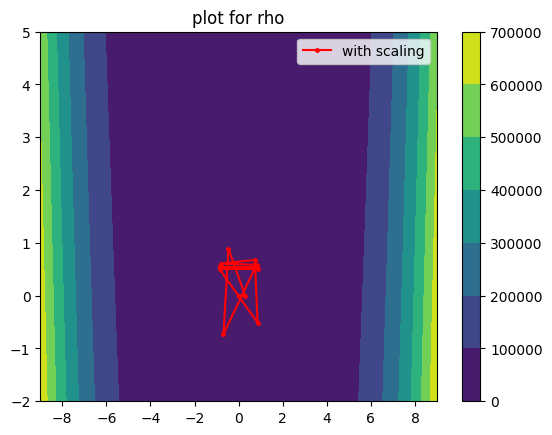

for rho 500 ,for iteration 500 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


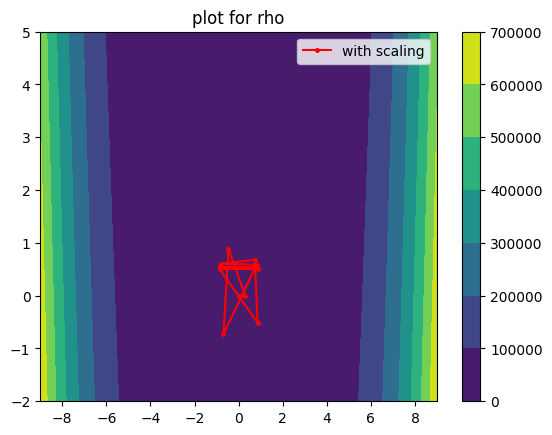

for rho 1000 ,for iteration 1000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


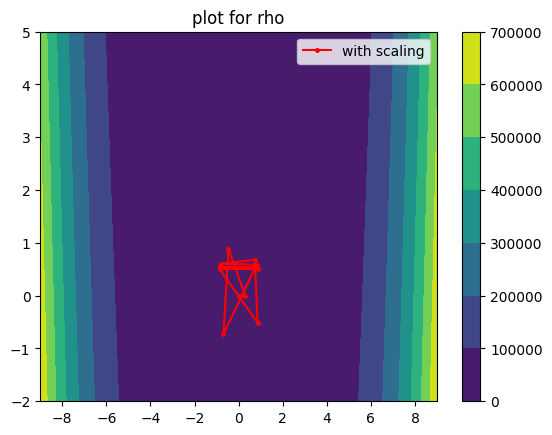

for rho 5000 ,for iteration 5000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


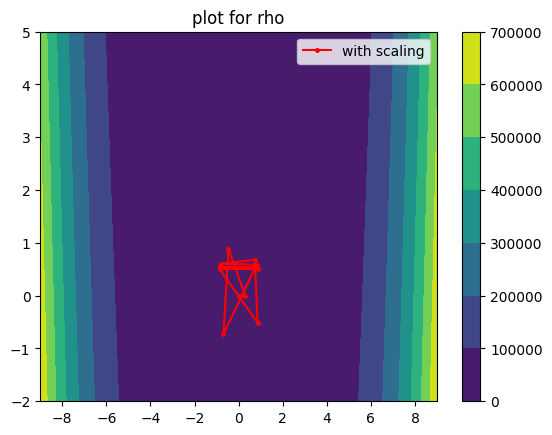

for rho 10000 ,for iteration 10000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


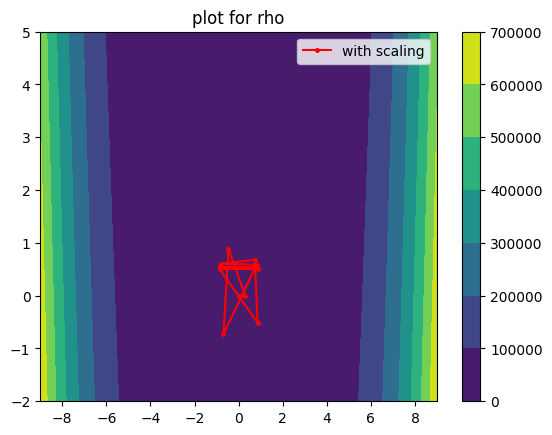

for rho 50000 ,for iteration 50000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


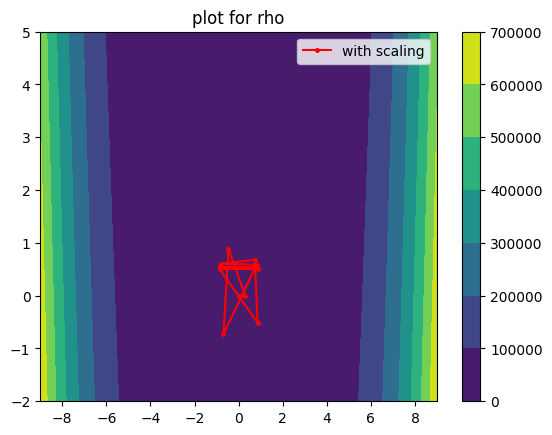

for rho 100000 ,for iteration 100000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


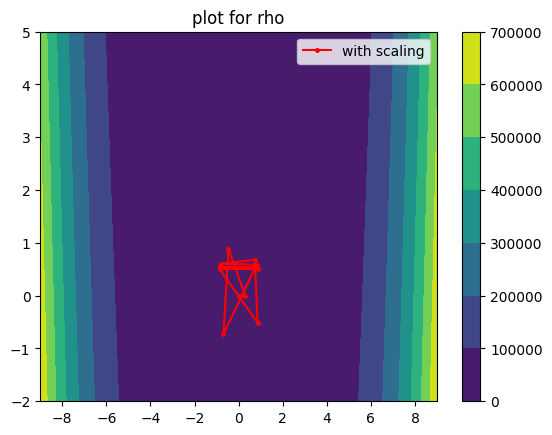

for rho 500000 ,for iteration 500000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


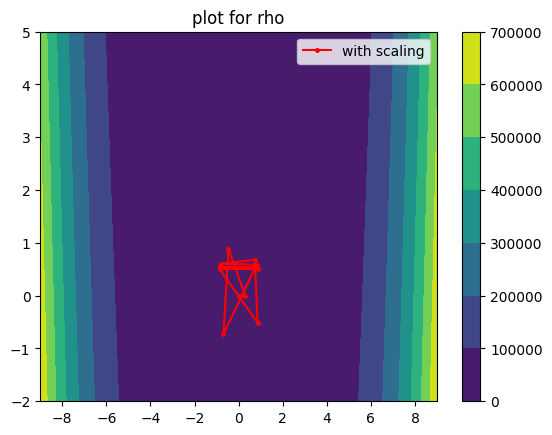

for rho 1000000 ,for iteration 1000000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


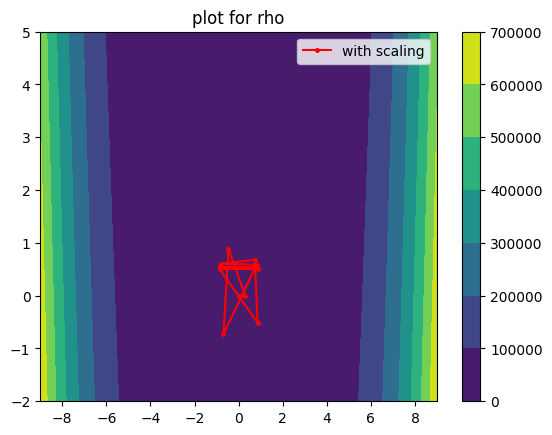

for rho 5000000 ,for iteration 5000000 minimizer is [-0.84274164  0.53831824] and Minimum value is 4.757752550249121  with scaling


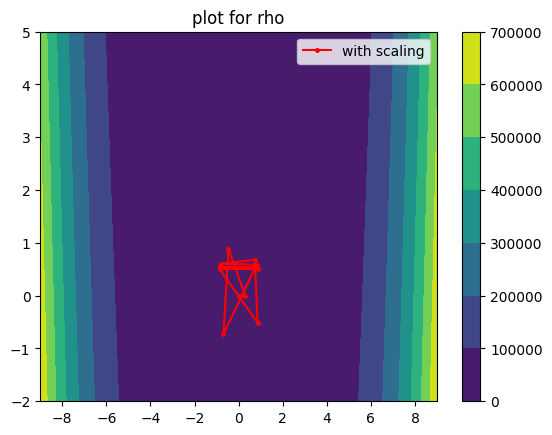

In [5]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
x0 = np.array([0,0])

alpha = 0.3
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

from numpy.linalg import norm

iterations_backtracking_with_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []


for rho in T:
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking(x0, T)
  print("for rho",rho,",for iteration",count2,"minimizer is",final_xk2,"and Minimum value is",final_val2," with scaling")

  x = np.linspace(-9, 9, 5000)
  y = np.linspace(-2, 5, 5000)
  X, Y = np.meshgrid(x, y)
  Z = fx1((X,Y))
  p = plt.contourf(X,Y,Z)
  plt.title("plot for rho")
  cbar = plt.colorbar(p)
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='red',  marker = '.', markersize = 5, label = 'with scaling')
  plt.legend()
  plt.show()
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_with_scaling.append(final_val2)

**Observation**

Here from the given algorithm 2 minimum calculated value of function is approx 4.75 and we see that for each iteration may be we get minimum value before the maximum iteration in each case.Since in each case we see that value of rho and number of iteration taken to find minimum value of f(x) are same.

**This algorithm is not giving exact minimum value of f(x) but it very fast as compare to gradient decend algorithm of lab03**

In [1]:
#for step size 0.7

import numpy as np
from numpy.linalg import norm
from numpy import exp, cos, sin
from math import sqrt, pi
from numpy import ma
def fx1(xk1):
  x1 = xk1[0]
  x2 = xk1[1]
  return 100*(x2-x1**2)**2 + (0.5-x1)**2

def gradient_fx1(xk1):

  x1 = xk1[0]
  x2 = xk1[1]
  return np.array([-400*x1*(x2-x1**2)-2*(0.5-x1), 200*(x2-x1**2)])

def prox(xk1):

  if norm(xk1)<=1:
    yt=xk1
    return yt
  else:
    yt=xk1/norm(xk1)
    return  yt


alpha=0.7

def gradient_descent_with_backtracking(x0, T):
  xk1 = np.copy(x0)

  count = 0
  pk = -1*gradient_fx1(xk1)
  xk1s = []
  xk1s.append(xk1)
  while count<rho:
    pk = -1*gradient_fx1(xk1)
    xk1 = xk1 + alpha*pk
    xk1=prox(xk1)
    xk1s.append(xk1)
    count += 1
  return count, xk1, fx1(xk1), xk1s

for rho 100 ,for iteration 100 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


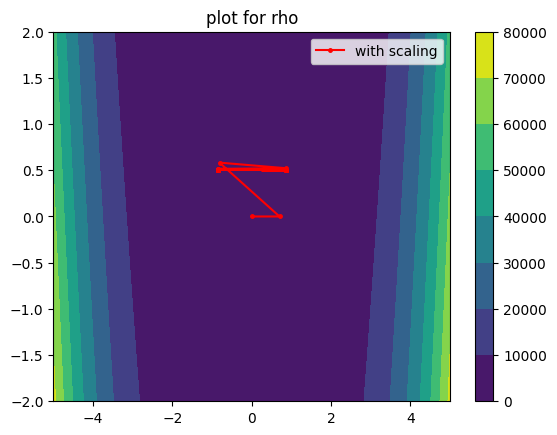

for rho 500 ,for iteration 500 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


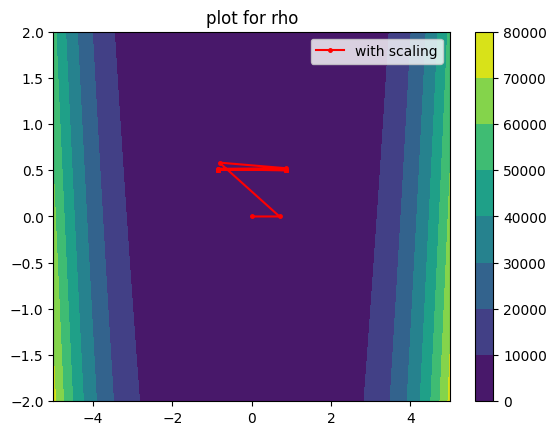

for rho 1000 ,for iteration 1000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


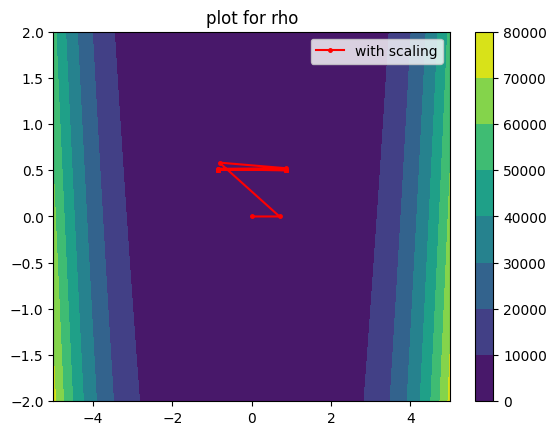

for rho 5000 ,for iteration 5000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


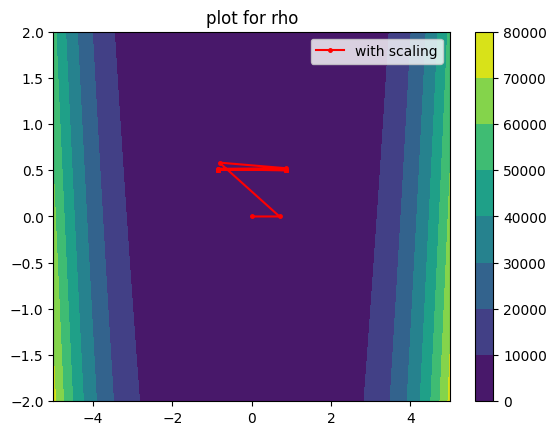

for rho 10000 ,for iteration 10000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


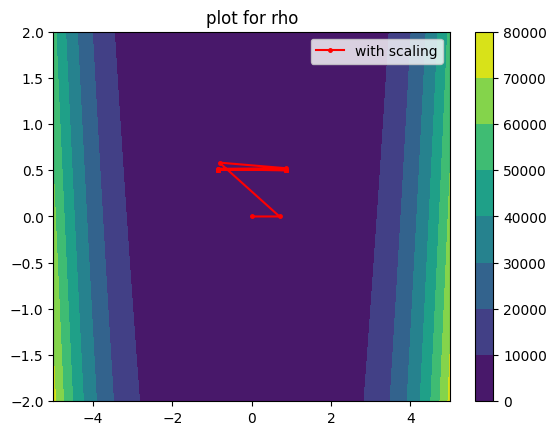

for rho 50000 ,for iteration 50000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


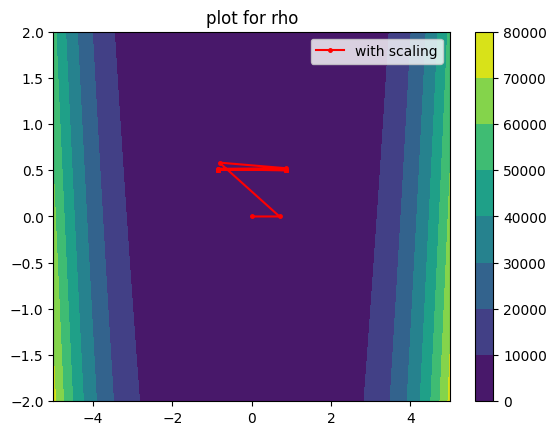

for rho 100000 ,for iteration 100000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


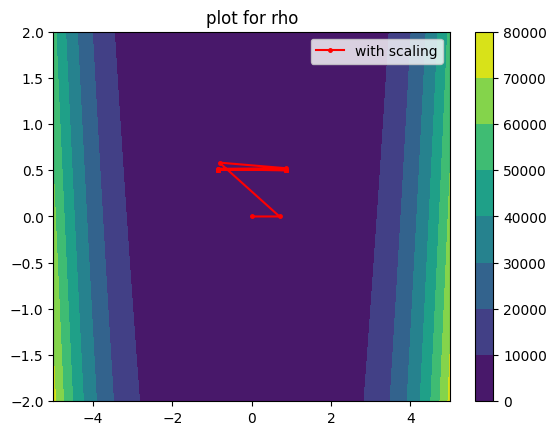

for rho 500000 ,for iteration 500000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


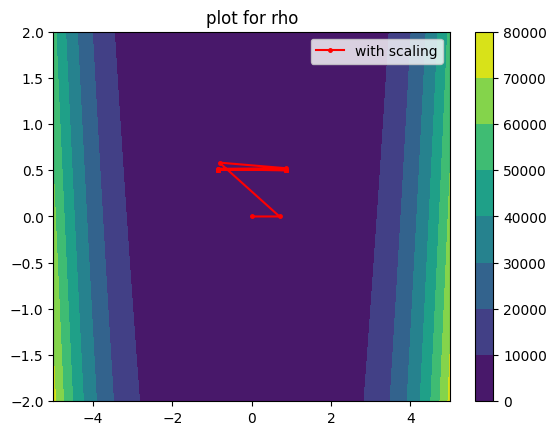

for rho 1000000 ,for iteration 1000000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


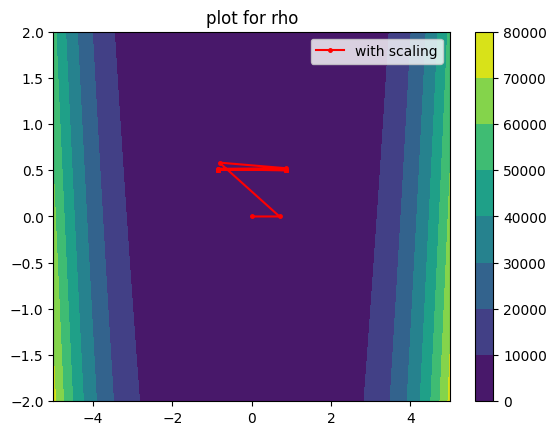

for rho 5000000 ,for iteration 5000000 minimizer is [-0.86146579  0.50781561] and Minimum value is 7.343599057006626  with scaling


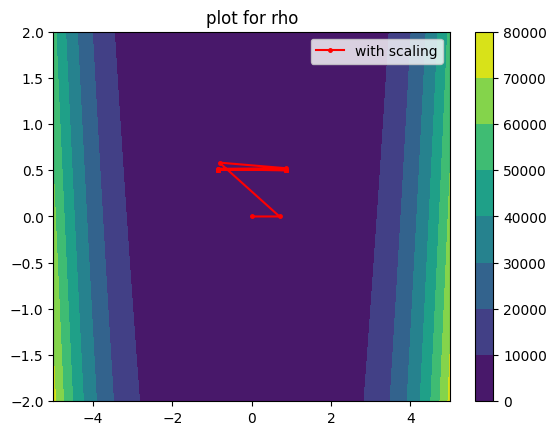

In [3]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
x0 = np.array([0,0])

alpha = 0.7
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

from numpy.linalg import norm

iterations_backtracking_with_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []


for rho in T:
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking(x0, T)
  print("for rho",rho,",for iteration",count2,"minimizer is",final_xk2,"and Minimum value is",final_val2," with scaling")

  x = np.linspace(-5, 5, 5000)
  y = np.linspace(-2, 2, 5000)
  X, Y = np.meshgrid(x, y)
  Z = fx1((X,Y))
  p = plt.contourf(X,Y,Z)
  plt.title("plot for rho")
  cbar = plt.colorbar(p)
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='red',  marker = '.', markersize = 5, label = 'with scaling')
  plt.legend()
  plt.show()
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_with_scaling.append(final_val2)

Will gradient descent with η = 0.7 gives the same
solution to the problem that we considered in this task ?

**NO**


**When η = 0.7**

The minimum of f(x) is approx 7.34 which not better than when η = 0.3 because when η = 0.3 minimum of f(x) was approx 4.75.Both are giving approximate minimum value of f(x) but for small step size it give better approximation